## Problem Statement Summary  
This research focuses on improving brain tumor detection using 3D deep learning models enhanced by 
attention-guided contextual feature learning. By leveraging 3D MRI scans, the approach preserves spatial integrity a
nd enables the model to focus on critical regions, improving detection accuracy.  

The task involves ulti-class classification, identifying one of four categories:  
- Normal: No tumor.  
- Glioma: Tumor from glial cells.  
- Meningioma: Tumor from brain membranes.  
- Pituitary: Tumor in the pituitary gland.  

This method aims to enhance accuracy, incorporate spatial context, and provide reliable predictions to support clinical
diagnosis and treatment planning.  

## Exploring the Dataset

The dataset used for this project is the "Crystal Clean: Brain Tumors MRI Dataset" available on Kaggle. 
It comprises brain MRI scans categorized into four classes: Pituitary, Glioma, Meningioma, and Normal. 
For this project, the focus is on two main classes: Tumor (including Pituitary, Glioma, and Meningioma) and Normal.

The dataset, provided in RAR archive format, contains 3066 normal brain MRI scans and 21,700 tumor MRI scans. 
The tumor scans are further divided into three directories, each corresponding to a specific tumor type.

The dataset has undergone a comprehensive data cleaning process to ensure quality and reliability. 
This process included the removal of duplicate samples, correction of mislabeled images, and resizing of all images to 
a uniform size of 224x224 pixels, optimizing them for efficient processing and analysis.

To enhance its robustness, the dataset was further augmented with techniques such as introducing random noise 
(salt and pepper noise), applying histogram equalization, rotating images, adjusting brightness, and flipping 
images horizontally or vertically. These augmentations were applied without altering the image labels to increase 
dataset diversity.

Prior to cleaning, the dataset included 500 normal scans, 926 Glioma, 937 Meningioma, and 901 Pituitary tumor scans. 
After the cleaning process, the number of samples decreased by about 3-6% per category, resulting in a more balanced 
representation.

In [1]:
# Import necessary libraries
import cv2  # For image processing
import os   # For directory operations

# Define a function to load images from a directory
def load_images_from_folder(folder):
    """
    Loads all images from a given folder and returns them as a list.
    
    Parameters:
        folder (str): Path to the directory containing images.
        
    Returns:
        list: A list of images loaded as NumPy arrays.
    """
    images = []
    for filename in os.listdir(folder):  # Iterate through files in the folder
        filepath = os.path.join(folder, filename)  # Get the full path of the file
        img = cv2.imread(filepath)  # Load the image
        if img is not None:  # Check if the image was successfully loaded
            images.append(img)  # Append the image to the list
    return images

# Load normal images
normal_images = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Normal')

# Load tumor images by type
glioma_images = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Tumor/glioma_tumor')
meningioma_images = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Tumor/meningioma_tumor')
pituitary_images = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor')

# Combine all tumor images into one list
tumor_images = glioma_images + meningioma_images + pituitary_images

# Print statistics to verify successful loading
print(f"Number of normal images: {len(normal_images)}")
print(f"Number of glioma images: {len(glioma_images)}")
print(f"Number of meningioma images: {len(meningioma_images)}")
print(f"Number of pituitary images: {len(pituitary_images)}")
print(f"Total tumor images: {len(tumor_images)}")


Number of normal images: 3066
Number of glioma images: 6307
Number of meningioma images: 6391
Number of pituitary images: 5908
Total tumor images: 18606


## Image Resizing

In [2]:
# Define a function to resize images to a uniform size
def resize_images(imgs, size=(128, 128)):
    """
    Resizes a list of images to a specified size.

    Parameters:
        imgs (list): List of images (NumPy arrays).
        size (tuple): Target size as (width, height).

    Returns:
        list: A list of resized images.
    """
    resized_images = []
    for img in imgs:
        if img is not None:  # Ensure the image is valid
            resized_img = cv2.resize(img, size)  # Resize the image
            resized_images.append(resized_img)  # Append to the resized images list
    return resized_images

# Resize normal images
normal_images = resize_images(normal_images, size=(128, 128))

# Resize tumor images
tumor_images = resize_images(tumor_images, size=(128, 128))

# Print confirmation
print(f"Number of resized normal images: {len(normal_images)}")
print(f"Number of resized tumor images: {len(tumor_images)}")

Number of resized normal images: 3066
Number of resized tumor images: 18606


## NB we are resizing to 128 due to space Allocated 

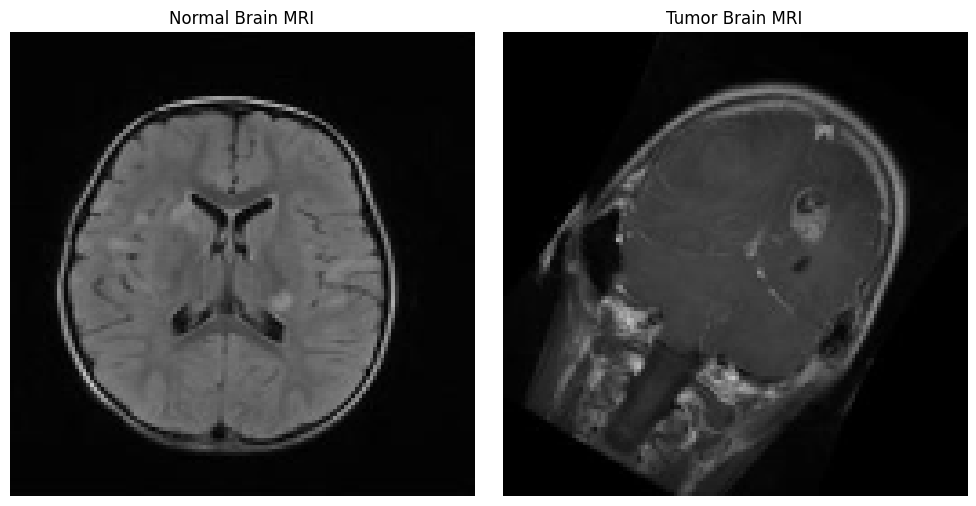

In [3]:
# Graphical Implementation

import matplotlib.pyplot as plt

# Display the first normal image
plt.figure(figsize=(10, 5))

# Plot the first normal image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(cv2.cvtColor(normal_images[0], cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
plt.title("Normal Brain MRI")
plt.axis('off')  # Hide axis

# Plot the first tumor image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.imshow(cv2.cvtColor(tumor_images[0], cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
plt.title("Tumor Brain MRI")
plt.axis('off')  # Hide axis

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
# Print out the shapes of the image arrays
print("Normal Images Shape Before:", np.array(normal_images).shape)
print("Tumor Images Shape Before:", np.array(tumor_images).shape)


Normal Images Shape Before: (3066, 128, 128, 3)
Tumor Images Shape Before: (18606, 128, 128, 3)


In [5]:
import numpy as np
# Convert lists to numpy arrays
normal_images = np.array(normal_images)
tumor_images = np.array(tumor_images)

# Normalize images (scaling pixel values to the range [0, 1])
normal_images = normal_images / 255.0
tumor_images = tumor_images / 255.0


The number of tumor images (18,606) is significantly larger than the number of normal images (3,066). because we had combined the tuor images

so we have to downsample

In [6]:
import numpy as np

# Get the total number of images
num_images = tumor_images.shape[0]  # Number of tumor images

# Randomly select 3066 indices
sample_indices = np.random.choice(num_images, 3066, replace=False)

# Use the sampled indices to select images
tumor_images = tumor_images[sample_indices]


In [7]:
print(f"Number of tumor images after sampling: {tumor_images.shape[0]}")

Number of tumor images after sampling: 3066


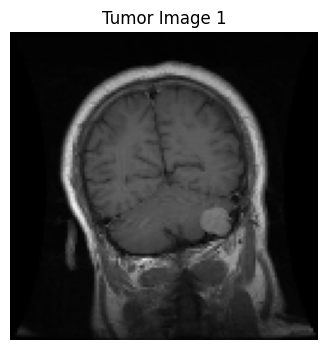

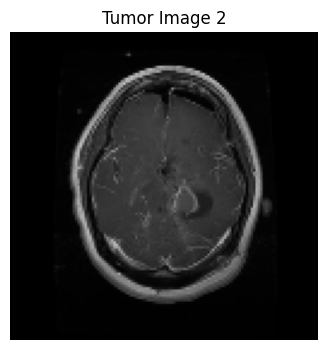

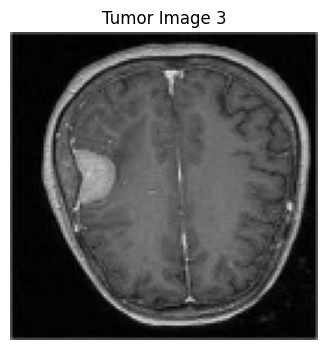

In [8]:
# Display the first three images after downsampling
for i in range(3):
    plt.figure(figsize=(4, 4))  # Set the figure size
    plt.imshow(tumor_images[i])  # Display the i-th image
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Tumor Image {i+1}")  # Add a title
    plt.show()

In [9]:
# Print out the shapes of the image arrays
print("Normal Images Shape ", np.array(normal_images).shape)
print("Tumor Images Shape ", np.array(tumor_images).shape)

Normal Images Shape  (3066, 128, 128, 3)
Tumor Images Shape  (3066, 128, 128, 3)


# Train-Test Split

In [10]:
import numpy as np

# Combine images into a single dataset
X = np.concatenate((normal_images, tumor_images), axis=0)

# Create corresponding labels: 0 for normal, 1 for tumor
y = np.concatenate((np.zeros(len(normal_images)), np.ones(len(tumor_images))), axis=0)


In [11]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Available Memory Checker
import psutil

# Check available memory
memory = psutil.virtual_memory()
print(f"Available memory: {memory.available / (1024**3):.2f} GB")


Available memory: 18.90 GB


## Model Building

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# First convolutional layer with 32 filters, 3x3 kernel size, ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# MaxPooling layer to reduce the spatial dimensions
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters, 3x3 kernel size, ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# MaxPooling layer to reduce the spatial dimensions
model.add(MaxPooling2D((2, 2)))

# Flatten the 3D feature maps into 1D vectors for the dense layers
model.add(Flatten())

# Fully connected layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with 1 unit and sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to see the architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

The CNN model consists of two convolutional layers, each followed by max-pooling layers to extract features and reduce spatial dimensions. The first convolutional layer uses 32 filters with a 3x3 kernel, and the second uses 64 filters with a 3x3 kernel. After the convolutional layers, the model flattens the feature maps into a 1D vector and passes it through a fully connected layer with 64 units. The output layer uses a single neuron with a sigmoid activation function for binary classification, determining whether the image is normal or contains a tumor. The model is compiled using the Adam optimizer and binary crossentropy loss.

In [14]:
print(X_train.shape)

(4905, 128, 128, 3)


## Data Augumentation 

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=20,     # Range (0-180) for random rotations
    width_shift_range=0.2, # Random horizontal translations (up to 20% of width)
    height_shift_range=0.2,# Random vertical translations (up to 20% of height)
    zoom_range=0.2,        # Random zoom (up to 20%)
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=True)    # Random vertical flip

# Fit the ImageDataGenerator to your training data
datagen.fit(X_train)


In [16]:
# Train the model using the augmented data with validation data
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Augmented training data
    steps_per_epoch=len(X_train) // 32,  # Number of steps per epoch (total samples / batch size)
    epochs=10,  # Number of epochs for training
    validation_data=(X_test, y_test)  # Evaluate the model on the test data after each epoch
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733312567.310783      70 service.cc:145] XLA service 0x7c3158004a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733312567.310830      70 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733312567.310835      70 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/153 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.4514 - loss: 0.8321

I0000 00:00:1733312570.669920      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


153/153 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.5084 - loss: 0.7429 - val_accuracy: 0.5371 - val_loss: 0.8861
Epoch 2/10
  1/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7500 - loss: 0.5948

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.5948 - val_accuracy: 0.5306 - val_loss: 0.9320
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.6909 - loss: 0.5911 - val_accuracy: 0.5827 - val_loss: 0.9576
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 0.9351 - val_accuracy: 0.6047 - val_loss: 0.8390
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.7517 - loss: 0.5309 - val_accuracy: 0.6610 - val_loss: 0.7005
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5025 - val_accuracy: 0.6447 - val_loss: 0.7545
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.7749 - loss: 0.4980 - val_accuracy: 0.6308 - val_loss: 0.7106
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.6001 - val_accuracy: 0.6218 - val_loss: 0.7256
Epoch 9/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.7472 - loss: 0.5229 - val_accuracy: 0

## Model Evaluation<!--  -->

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [18]:
# Convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.7489812550937245
Precision: 0.8864864864864865
Recall: 0.5521885521885522
F1 Score: 0.6804979253112035
ROC AUC: 0.7429189206440392


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 74.90%


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[591  42]
 [266 328]]


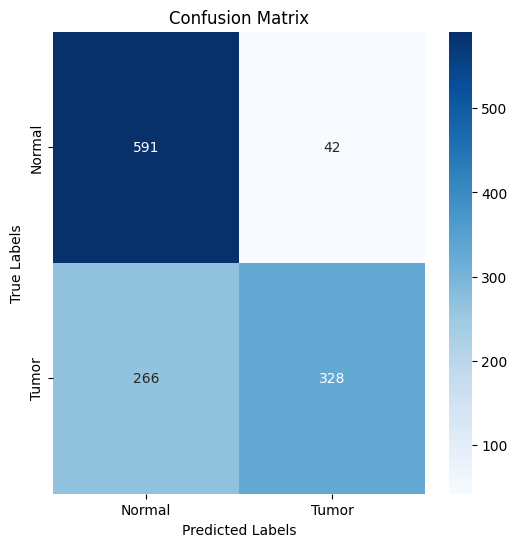

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])

# Set plot labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

Confusion Matrics

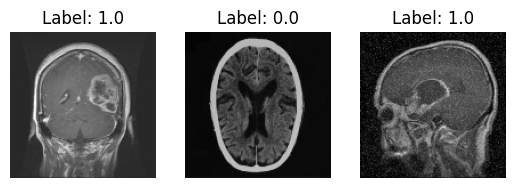

In [23]:
import matplotlib.pyplot as plt

# Print the first 3 images and their true labels from y_test
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each image
    plt.imshow(X_test[i])      # Display the image
    plt.title(f"Label: {y_test[i]}")  # Display the label as the title
    plt.axis('off')  # Hide axes for better visualization

plt.show()  # Show the images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Predictions for the first three images: [[0.73212594]
 [0.5174564 ]
 [0.42674777]]
True labels for the first three images: [1. 0. 1.]


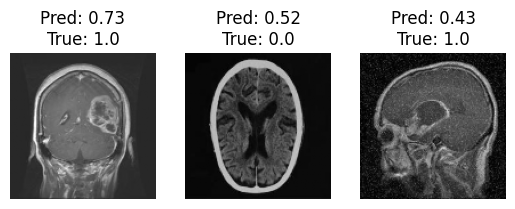

In [24]:
import matplotlib.pyplot as plt

# Make predictions on the first three images in X_test
y_pred = model.predict(X_test[:3])

# Print the predicted labels for the first three images
print("Predictions for the first three images:", y_pred)

# Print the true labels for comparison
print("True labels for the first three images:", y_test[:3])

# Visualize the first three images along with predicted and true labels
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each image
    plt.imshow(X_test[i])      # Display the image
    plt.title(f"Pred: {y_pred[i][0]:.2f}\nTrue: {y_test[i]}")  # Show prediction and true label as title
    plt.axis('off')  # Hide axes for better visualization

plt.show()  # Show the images


# Saving Model

In [25]:
# Save the trained model to a file
model.save('tumor_binary_classifier_model.h5')

In [26]:
# Save the trained model to a file
model.save('tumor_binary_classifier_model.h5')

In [27]:
# Loading model
from keras.models import load_model

# Load the model from the file
loaded_model = load_model('tumor_binary_classifier_model.h5')

# Verify by predicting with the loaded model
y_pred_loaded_model = loaded_model.predict(X_test)
y_pred_loaded_model = (y_pred_loaded_model > 0.5).astype(int).flatten()

# Compute metrics for the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded_model)
precision_loaded = precision_score(y_test, y_pred_loaded_model)
recall_loaded = recall_score(y_test, y_pred_loaded_model)
f1_loaded = f1_score(y_test, y_pred_loaded_model)
roc_auc_loaded = roc_auc_score(y_test, loaded_model.predict(X_test))  # Use probabilities for ROC AUC

# Print metrics for the loaded model
print(f"Loaded Model Accuracy: {accuracy_loaded}")
print(f"Loaded Model Precision: {precision_loaded}")
print(f"Loaded Model Recall: {recall_loaded}")
print(f"Loaded Model F1 Score: {f1_loaded}")
print(f"Loaded Model ROC AUC: {roc_auc_loaded}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Loaded Model Accuracy: 0.7489812550937245
Loaded Model Precision: 0.8864864864864865
Loaded Model Recall: 0.5521885521885522
Loaded Model F1 Score: 0.6804979253112035
Loaded Model ROC AUC: 0.8780937335439705
